# Exercise with bank marketing data

## Introduction

- Data from the UCI Machine Learning Repository: [data](https://github.com/justmarkham/DAT8/blob/master/data/bank-additional.csv), [data dictionary](https://archive.ics.uci.edu/ml/datasets/Bank+Marketing)
- **Goal:** Predict whether a customer will purchase a bank product marketed over the phone
- `bank-additional.csv` is already in our repo, so there is no need to download the data from the UCI website

## Step 1: Read the data into Pandas

In [99]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import matplotlib
matplotlib.style.use('ggplot')


path = '../data/'
url = path + 'bank-additional.csv'
bank = pd.read_csv(url, sep=';')
bank.shape

(4119, 21)

In [3]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,2,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,1,999,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,3,999,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no


In [119]:
print bank['cons.conf.idx'].mean()

-40.4991017237


In [123]:
bank['cons.conf.idx'].sample(50, random_state=123)

2314   -42.0
1683   -26.9
2164   -42.0
3684   -42.7
3692   -36.4
3780   -42.7
3689   -42.7
2119   -42.7
1572   -46.2
1003   -36.4
1334   -36.4
3188   -36.4
591    -42.7
3276   -36.4
736    -47.1
1940   -36.1
1188   -42.7
1213   -46.2
709    -42.7
1707   -36.4
1247   -42.7
2879   -42.7
533    -36.4
3445   -26.9
2849   -36.1
3571   -42.7
2740   -42.7
3388   -42.7
2183   -42.7
698    -36.4
3938   -33.6
3707   -40.0
2186   -36.4
3420   -46.2
711    -42.7
1780   -36.1
2725   -40.8
684    -42.0
3900   -36.4
1337   -36.1
1644   -36.1
3518   -36.4
1720   -42.7
1757   -36.4
543    -36.1
2642   -42.7
2730   -36.1
3988   -46.2
3979   -47.1
995    -42.0
Name: cons.conf.idx, dtype: float64

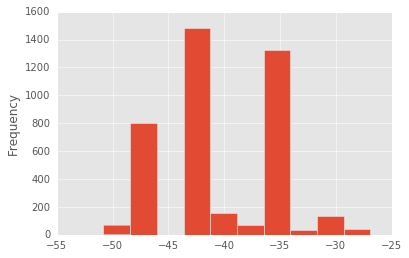

In [132]:
bank['cons.conf.idx'].plot(kind='hist')

In [8]:
bank.poutcome

0       nonexistent
1       nonexistent
2       nonexistent
3       nonexistent
4       nonexistent
5           failure
6       nonexistent
7       nonexistent
8           failure
9       nonexistent
10      nonexistent
11      nonexistent
12      nonexistent
13      nonexistent
14      nonexistent
15      nonexistent
16      nonexistent
17      nonexistent
18      nonexistent
19      nonexistent
20      nonexistent
21          success
22      nonexistent
23      nonexistent
24      nonexistent
25      nonexistent
26      nonexistent
27          failure
28      nonexistent
29      nonexistent
           ...     
4089        failure
4090    nonexistent
4091    nonexistent
4092    nonexistent
4093    nonexistent
4094        success
4095    nonexistent
4096    nonexistent
4097    nonexistent
4098    nonexistent
4099    nonexistent
4100    nonexistent
4101    nonexistent
4102    nonexistent
4103    nonexistent
4104    nonexistent
4105    nonexistent
4106    nonexistent
4107    nonexistent


## Step 2: Prepare at least three features

- Include both numeric and categorical features
- Choose features that you think might be related to the response (based on intuition or exploration)
- Think about how to handle missing values (encoded as "unknown")

In [19]:
# display all column names (for reference)
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'subscribe'],
      dtype='object')

In [9]:
bank.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribe
count,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000,4119.000000
mean,40.113620,256.788055,2.537266,960.422190,0.190337,0.084972,93.579704,-40.499102,3.621356,5166.481695,0.109493
std,10.313362,254.703736,2.568159,191.922786,0.541788,1.563114,0.579349,4.594578,1.733591,73.667904,0.312294
min,18.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.635000,4963.600000,0.000000
25%,32.000000,103.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,0.000000
50%,38.000000,181.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.000000
75%,47.000000,317.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.000000
max,88.000000,3643.000000,35.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,1.000000


In [69]:
bank.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [18]:
print bank['emp.var.rate']

0      -1.8
1       1.1
2       1.4
3       1.4
4      -0.1
5      -1.1
6      -1.1
7      -0.1
8      -0.1
9       1.1
10      1.4
11      1.4
12      1.1
13      1.4
14     -1.8
15      1.4
16      1.4
17      1.4
18      1.4
19      1.4
20      1.4
21     -1.8
22      1.4
23      1.4
24      1.1
25      1.4
26      1.1
27     -1.8
28      1.1
29      1.4
       ... 
4089   -3.4
4090    1.1
4091    1.1
4092    1.4
4093    1.4
4094   -3.4
4095    1.4
4096    1.1
4097    1.4
4098    1.4
4099    1.4
4100   -1.8
4101    1.4
4102    1.4
4103    1.1
4104    1.4
4105    1.4
4106   -1.8
4107    1.4
4108   -1.8
4109   -3.4
4110    1.1
4111   -1.7
4112   -0.1
4113   -0.1
4114    1.4
4115    1.4
4116   -1.8
4117    1.4
4118   -0.1
Name: emp.var.rate, dtype: float64


In [ ]:
#housing, loan, duration, cons.conf.idx

### y (response)

In [235]:
# The y values are text.  Convert the values to numeric values and store as a new column 
bank['subscribe'] = bank.y.map({'no':0, 'yes':1})
print bank.subscribe.value_counts()

0    3668
1     451
Name: subscribe, dtype: int64


array([<matplotlib.axes._subplots.AxesSubplot object at 0x179d4dfd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x17c13bfd0>], dtype=object)

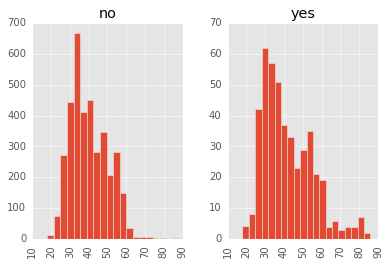

In [190]:
bank.hist(column='age', by='y', bins=20)

In [194]:
bank.groupby('y').describe()

Job_blue-collar  Job_entrepreneur  Job_housemaid  Job_management  \
y                                                                             
no  count      3668.000000       3668.000000    3668.000000     3668.000000   
    mean          0.224373          0.038168       0.026990        0.080153   
    std           0.417226          0.191628       0.162077        0.271566   
    min           0.000000          0.000000       0.000000        0.000000   
    25%           0.000000          0.000000       0.000000        0.000000   
    50%           0.000000          0.000000       0.000000        0.000000   
    75%           0.000000          0.000000       0.000000        0.000000   
    max           1.000000          1.000000       1.000000        1.000000   
yes count       451.000000        451.000000     451.000000      451.000000   
    mean          0.135255          0.017738       0.024390        0.066519   
    std           0.342376          0.132145       0.154429        0.249464   
    min           0.000000          0.000000       0.000000        0.000000   
    25%           0.000000          0.000000       0.000000        0.000000   
    50%           0.000000          0.000000       0.000000        0.000000   
    75%           0.000000          0.000000       0.000000        0.000000   
    max           1.000000          1.000000       1.000000        1.000000   

           Job_retired  Job_self-employed  Job_services  Job_student  \
y                                                                      
no  count  3668.000000        3668.000000   3668.000000  3668.000000   
    mean      0.034896           0.039804      0.097601     0.017176   
    std       0.183542           0.195524      0.296815     0.129943   
    min       0.000000           0.000000      0.000000     0.000000   
    25%       0.000000           0.000000      0.000000     0.000000   
    50%       0.000000           0.000000      0.000000     0.000000   
    75%       0.000000           0.000000      0.000000     0.000000   
    max       1.000000           1.000000      1.000000     1.000000   
yes count   451.000000         451.000000    451.000000   451.000000   
    mean      0.084257           0.028825      0.077605     0.042129   
    std       0.278082           0.167500      0.267847     0.201106   
    min       0.000000           0.000000      0.000000     0.000000   
    25%       0.000000           0.000000      0.000000     0.000000   
    50%       0.000000           0.000000      0.000000     0.000000   
    75%       0.000000           0.000000      0.000000     0.000000   
    max       1.000000           1.000000      1.000000     1.000000   

           Job_technician  Job_unemployed     ...       cons.conf.idx  \
y                                             ...                       
no  count     3668.000000     3668.000000     ...         3668.000000   
    mean         0.166576        0.025082     ...          -40.586723   
    std          0.372647        0.156395     ...            4.395060   
    min          0.000000        0.000000     ...          -50.800000   
    25%          0.000000        0.000000     ...          -42.700000   
    50%          0.000000        0.000000     ...          -41.800000   
    75%          0.000000        0.000000     ...          -36.400000   
    max          1.000000        1.000000     ...          -26.900000   
yes count      451.000000      451.000000     ...          451.000000   
    mean         0.177384        0.042129     ...          -39.786475   
    std          0.382417        0.201106     ...            5.933069   
    min          0.000000        0.000000     ...          -50.800000   
    25%          0.000000        0.000000     ...          -42.700000   
    50%          0.000000        0.000000     ...          -40.300000   
    75%          0.000000        0.000000     ...          -36.100000   
    max          1.000000        1.000000     ... 

### Evaluate each feature to see if it will to be useful to try in our model.  Add numerical values or dummy variables for category type features as appropriate

### age

In [26]:
%matplotlib inline

In [27]:
# evaluate the feature
bank.age

0       30
1       39
2       25
3       38
4       47
5       32
6       32
7       41
8       31
9       35
10      25
11      36
12      36
13      47
14      29
15      27
16      44
17      46
18      45
19      50
20      55
21      39
22      29
23      40
24      44
25      38
26      36
27      28
28      47
29      34
        ..
4089    25
4090    43
4091    38
4092    30
4093    56
4094    62
4095    36
4096    33
4097    41
4098    34
4099    58
4100    41
4101    35
4102    31
4103    43
4104    42
4105    47
4106    45
4107    36
4108    32
4109    63
4110    53
4111    30
4112    31
4113    31
4114    30
4115    39
4116    27
4117    58
4118    34
Name: age, dtype: int64

In [8]:
bank.age.value_counts()

32    216
31    191
30    177
34    174
35    172
33    170
36    168
38    150
41    147
29    139
37    137
39    133
42    112
43    108
28    108
47    107
45    104
40    103
46     99
44     97
54     88
27     87
48     86
49     85
50     85
53     78
52     77
51     77
56     75
55     68
     ... 
23     16
22     10
61      7
21      7
66      6
64      5
71      5
62      5
20      4
80      4
68      4
67      4
76      4
63      4
73      3
65      3
74      3
18      3
81      3
78      3
75      2
72      2
69      2
77      2
70      2
82      2
86      2
88      1
19      1
85      1
Name: age, dtype: int64

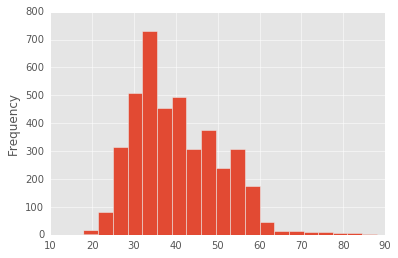

In [197]:
bank.age.plot(kind='hist', bins=20)

### job

In [181]:
# create a DataFrame of dummy variables for job
job_dummies = pd.get_dummies(bank.job, prefix='Job')
job_dummies.drop(job_dummies.columns[0], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
bank = pd.concat([bank, job_dummies], axis=1)

In [182]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,0,0,0,0,0,0,0,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,0,0,0,0,1,0,0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,0,0,0,0,1,0,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,0,0,0,0,1,0,0,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,0,0,0,0,0,0,0,0,0


In [183]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y',
       u'poutcome_failure', u'poutcome_success', u'Job_blue-collar',
       u'Job_entrepreneur', u'Job_housemaid', u'Job_management',
       u'Job_retired', u'Job_self-employed', u'Job_services', u'Job_student',
       u'Job_technician', u'Job_unemployed', u'Job_unknown'],
      dtype='object')

In [21]:
bank[['age', 'job', 'marital', 'y']].sort_values(by = 'age')


,age,job,marital,y
899,18,student,single,no
477,18,student,single,yes
1661,18,student,single,no
1887,19,student,single,no
3268,20,blue-collar,single,no
39,20,student,single,no
1377,20,student,single,no
1275,20,student,single,no
1040,21,services,single,no
2629,21,student,single,yes


In [28]:
# evaluate the feature
bank.job

0         blue-collar
1            services
2            services
3            services
4              admin.
5            services
6              admin.
7        entrepreneur
8            services
9         blue-collar
10           services
11      self-employed
12             admin.
13        blue-collar
14             admin.
15           services
16             admin.
17             admin.
18       entrepreneur
19        blue-collar
20           services
21         technician
22         technician
23         management
24         technician
25         technician
26         technician
27        blue-collar
28             admin.
29             admin.
            ...      
4089           admin.
4090      blue-collar
4091       management
4092      blue-collar
4093          retired
4094      blue-collar
4095           admin.
4096         services
4097      blue-collar
4098        housemaid
4099           admin.
4100           admin.
4101     entrepreneur
4102      blue-collar
4103      

In [25]:
job_counts = bank['job'].value_counts()
job_counts

admin.           1012
blue-collar       884
technician        691
services          393
management        324
retired           166
self-employed     159
entrepreneur      148
unemployed        111
housemaid         110
student            82
unknown            39
Name: job, dtype: int64

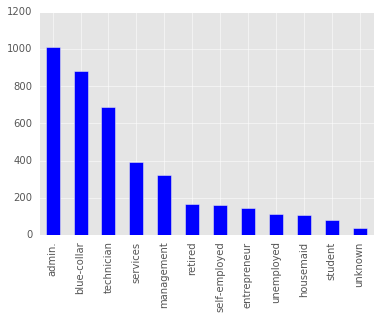

In [212]:
job_counts.plot(kind='bar')

In [228]:
job_counts_admin = bank['job'] == 'admin.'
job_counts_admin2 = bank[job_counts_admin]

job_counts_admin2.sort_values(by='housing')

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,Job_entrepreneur,Job_housemaid,Job_management,Job_retired,Job_self-employed,Job_services,Job_student,Job_technician,Job_unemployed,Job_unknown
4117,58,admin.,married,high.school,no,no,no,cellular,aug,fri,...,0,0,0,0,0,0,0,0,0,0
1656,41,admin.,married,university.degree,no,no,no,cellular,aug,tue,...,0,0,0,0,0,0,0,0,0,0
1645,28,admin.,married,university.degree,no,no,no,cellular,aug,fri,...,0,0,0,0,0,0,0,0,0,0
1632,29,admin.,married,university.degree,no,no,yes,cellular,jun,tue,...,0,0,0,0,0,0,0,0,0,0
1621,34,admin.,married,university.degree,no,no,no,telephone,may,tue,...,0,0,0,0,0,0,0,0,0,0
1620,50,admin.,married,university.degree,no,no,yes,telephone,may,tue,...,0,0,0,0,0,0,0,0,0,0
1608,39,admin.,divorced,university.degree,no,no,yes,cellular,jul,mon,...,0,0,0,0,0,0,0,0,0,0
1597,51,admin.,married,high.school,no,no,no,cellular,nov,wed,...,0,0,0,0,0,0,0,0,0,0
1594,47,admin.,single,university.degree,no,no,no,cellular,aug,thu,...,0,0,0,0,0,0,0,0,0,0
3191,37,admin.,married,high.school,no,no,no,cellular,may,fri,...,0,0,0,0,0,0,0,0,0,0


In [32]:
bank[['age', 'job', 'default', 'month', 'duration', 'previous', 'poutcome', 'euribor3m', 'y']][:25]

,age,job,default,month,duration,previous,poutcome,euribor3m,y
0,30,blue-collar,no,may,487,0,nonexistent,1.313,no
1,39,services,no,may,346,0,nonexistent,4.855,no
2,25,services,no,jun,227,0,nonexistent,4.962,no
3,38,services,no,jun,17,0,nonexistent,4.959,no
4,47,admin.,no,nov,58,0,nonexistent,4.191,no
5,32,services,no,sep,128,2,failure,0.884,no
6,32,admin.,no,sep,290,0,nonexistent,0.879,no
7,41,entrepreneur,unknown,nov,44,0,nonexistent,4.191,no
8,31,services,no,nov,68,1,failure,4.153,no
9,35,blue-collar,unknown,may,170,0,nonexistent,4.855,no


In [185]:
bank['y'].value_counts()

no     3668
yes     451
Name: y, dtype: int64

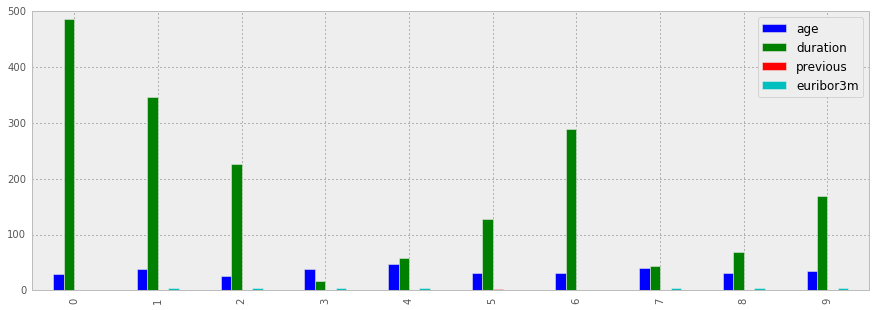

In [30]:
bank[['age', 'job', 'default', 'month', 'duration', 'previous', 'poutcome', 'euribor3m', 'y']][:10].plot(kind='bar')

### default

In [36]:
# evaluate the feature
bank.default

0            no
1            no
2            no
3            no
4            no
5            no
6            no
7       unknown
8            no
9       unknown
10      unknown
11           no
12           no
13           no
14           no
15           no
16           no
17           no
18      unknown
19           no
20      unknown
21           no
22           no
23           no
24      unknown
25           no
26           no
27      unknown
28      unknown
29           no
         ...   
4089         no
4090    unknown
4091    unknown
4092         no
4093    unknown
4094         no
4095         no
4096         no
4097         no
4098         no
4099         no
4100         no
4101         no
4102    unknown
4103         no
4104         no
4105    unknown
4106         no
4107    unknown
4108         no
4109         no
4110    unknown
4111         no
4112         no
4113         no
4114         no
4115         no
4116         no
4117         no
4118         no
Name: default, dtype: ob

In [68]:
bank['default'].value_counts()

no         3315
unknown     803
yes           1
Name: default, dtype: int64

In [97]:
bank.groupby('default').describe()

age     campaign  cons.conf.idx  cons.price.idx  \
default                                                                  
no      count  3315.000000  3315.000000    3315.000000     3315.000000   
        mean     39.293816     2.510407     -40.547903       93.533461   
        std      10.269245     2.577138       4.745098        0.587180   
        min      18.000000     1.000000     -50.800000       92.201000   
        25%      32.000000     1.000000     -42.700000       93.075000   
        50%      37.000000     2.000000     -41.800000       93.444000   
        75%      46.000000     3.000000     -36.400000       93.994000   
        max      88.000000    35.000000     -26.900000       94.767000   
unknown count   803.000000   803.000000     803.000000      803.000000   
        mean     43.509340     2.648817     -40.295766       93.771083   
        std       9.795711     2.530849       3.911481        0.503032   
        min      19.000000     1.000000     -50.000000       92.201000   
        25%      36.000000     1.000000     -42.700000       93.444000   
        50%      43.000000     2.000000     -41.800000       93.918000   
        75%      51.000000     3.000000     -36.400000       93.994000   
        max      86.000000    19.000000     -26.900000       94.601000   
yes     count     1.000000     1.000000       1.000000        1.000000   
        mean     31.000000     2.000000     -42.000000       93.200000   
        std            NaN          NaN            NaN             NaN   
        min      31.000000     2.000000     -42.000000       93.200000   
        25%      31.000000     2.000000     -42.000000       93.200000   
        50%      31.000000     2.000000     -42.000000       93.200000   
        75%      31.000000     2.000000     -42.000000       93.200000   
        max      31.000000     2.000000     -42.000000       93.200000   

                  duration  emp.var.rate    euribor3m  nr.employed  \
default                                                              
no      count  3315.000000   3315.000000  3315.000000  3315.000000   
        mean    259.314027     -0.056953     3.470430  5160.396350   
        std     261.898466      1.604500     1.777393    77.012711   
        min       0.000000     -3.400000     0.635000  4963.600000   
        25%     105.000000     -1.800000     1.313000  5099.100000   
        50%     181.000000      1.100000     4.856000  5191.000000   
        75%     316.000000      1.400000     4.961000  5228.100000   
        max    3643.000000      1.400000     5.045000  5228.100000   
unknown count   803.000000    803.000000   803.000000   803.000000   
        mean    246.541719      0.671108     4.243756  5191.567123   
        std     222.529276      1.216732     1.376584    50.731535   
        min       6.000000     -3.400000     0.715000  4963.600000   
        25%      97.500000      1.100000     4.855000  5191.000000   
        50%     176.000000      1.100000     4.860000  5195.800000   
        75%     321.000000      1.400000     4.961000  5228.100000   
        max    1720.000000      1.400000     4.970000  5228.100000   
yes     count     1.000000      1.000000     1.000000     1.000000   
        mean    111.000000     -0.100000     4.153000  5195.800000   
        std            NaN           NaN          NaN          NaN   
        min     111.000000     -0.100000     4.153000  5195.800000   
        25%     111.000000     -0.100000     4.153000  5195.800000   
        50%     111.000000     -0.100000     4.153000  5195.800000   
        75%     111.000000     -0.100000     4.153000  5195.800000   
        max     111.000000     -0.100000     4.153000  5195.800000   

                     pdays     previous  
default                                  
no      count  3315.000000  3315.000000  
        mean    951.962594     0.215083  
        std     210.993259     0.579171  
        min       0.000000     0.000000  
        25%     999.00000

In [107]:
bank[['default','age', 'duration', 'cons.conf.idx']].groupby('default').mean()

,age,duration,cons.conf.idx
default,,,
no,39.293816,259.314027,-40.547903
unknown,43.509340,246.541719,-40.295766
yes,31.000000,111.000000,-42.000000


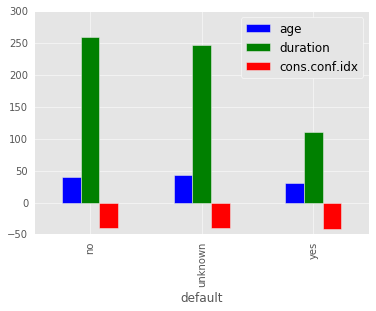

In [104]:
bank[['default','age', 'duration', 'cons.conf.idx']].groupby('default').mean().plot(kind='bar')

In [134]:
# create a DataFrame of dummy variables for job
default_dummies = pd.get_dummies(bank.default, prefix='default')
default_dummies.drop(default_dummies.columns[1], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
bank = pd.concat([bank, default_dummies], axis=1)

In [135]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_no,default_yes
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0


In [136]:
bank

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,default_no,default_yes
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,1,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,1,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,0,nonexistent,1.4,94.465,-41.8,4.962,5228.1,no,1,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,0,nonexistent,1.4,94.465,-41.8,4.959,5228.1,no,1,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,1,0
5,32,services,single,university.degree,no,no,no,cellular,sep,thu,...,2,failure,-1.1,94.199,-37.5,0.884,4963.6,no,1,0
6,32,admin.,single,university.degree,no,yes,no,cellular,sep,mon,...,0,nonexistent,-1.1,94.199,-37.5,0.879,4963.6,no,1,0
7,41,entrepreneur,married,university.degree,unknown,yes,no,cellular,nov,mon,...,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8,no,0,0
8,31,services,divorced,professional.course,no,no,no,cellular,nov,tue,...,1,failure,-0.1,93.200,-42.0,4.153,5195.8,no,1,0
9,35,blue-collar,married,basic.9y,unknown,no,no,telephone,may,thu,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0


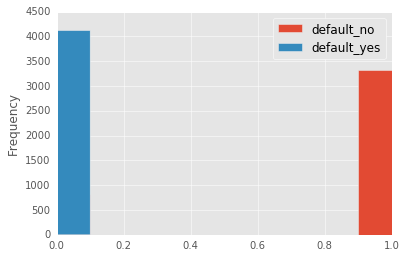

In [137]:
bank[['default_no', 'default_yes']].plot(kind='hist')

In [139]:
bank.shape

(4119, 23)

In [138]:
bank[['default_no', 'default_yes']].shape

(4119, 2)

In [148]:
bank[['default_no', 'default_yes']].sum()

default_no     3315
default_yes       1
dtype: float64

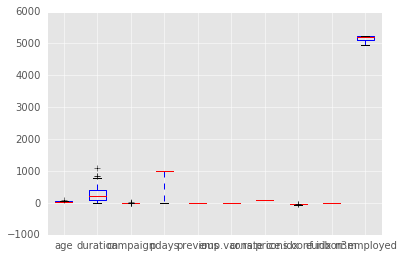

In [95]:

bank[:100].plot.box(by = 'age')

### contact

In [ ]:
# evaluate the feature

### month

In [ ]:
# evaluate the feature

### duration

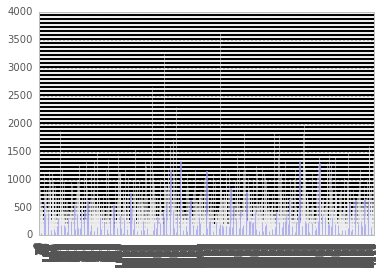

In [45]:
# evaluate the feature
bank['duration'].plot(kind='bar')

In [52]:
bank['duration'].sort_values()

1950       0
1600       4
1896       5
934        5
2202       5
2534       5
441        6
3426       6
2020       6
358        6
2673       6
3895       7
4027       7
1008       7
108        7
2173       8
1874       8
1936       8
2527       8
1731       8
1093       8
2218       9
571        9
1265       9
1200       9
1999       9
3438       9
2583       9
330        9
3574       9
        ... 
3208    1340
685     1348
1310    1353
3031    1357
854     1360
3262    1365
4109    1386
3448    1422
3646    1424
2948    1432
3575    1438
2440    1441
977     1447
3808    1468
720     1476
1190    1551
4059    1590
4069    1602
1609    1628
1651    1720
2957    1806
3256    1820
2900    1855
2530    1855
262     1868
3266    1980
1685    2301
1392    2653
1546    3253
2231    3643
Name: duration, dtype: int64

### previous

In [55]:
# evaluate the feature
bank['previous'].sort_values()

0       0
2638    0
2639    0
2640    0
2641    0
2642    0
2643    0
2644    0
2645    0
2646    0
2647    0
2648    0
2649    0
2650    0
2651    0
2652    0
2653    0
2654    0
2655    0
2656    0
2657    0
2658    0
2659    0
2660    0
2662    0
2663    0
2636    0
2635    0
2634    0
2633    0
       ..
1046    3
2902    3
1591    3
153     3
1752    3
2285    3
947     3
4071    3
3617    3
1272    3
1576    3
3112    3
3402    4
1660    4
3210    4
1096    4
965     4
1846    4
3703    4
696     4
1793    4
3662    4
517     4
1298    4
3063    4
2862    4
2018    5
448     5
589     6
2122    6
Name: previous, dtype: int64

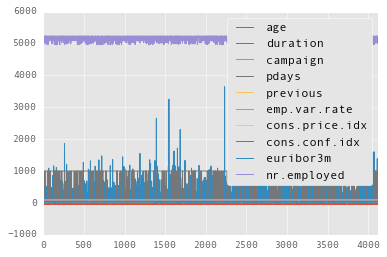

In [62]:
bank.plot()

### poutcome

In [118]:
# evaluate the feature
bank['poutcome'].value_counts()

nonexistent    3523
failure         454
success         142
Name: poutcome, dtype: int64

In [152]:
# create a DataFrame of dummy variables for job
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')
poutcome_dummies.drop(poutcome_dummies.columns[1], axis=1, inplace=True)

# concatenate the original DataFrame and the dummy DataFrame
bank = pd.concat([bank, poutcome_dummies], axis=1)

In [153]:
bank.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,euribor3m,nr.employed,y,default_no,default_yes,poutcome_failure,poutcome_nonexistent,poutcome_success,poutcome_failure,poutcome_success
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,1.313,5099.1,no,1,0,0,1,0,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,4.855,5191.0,no,1,0,0,1,0,0,0
2,25,services,married,high.school,no,yes,no,telephone,jun,wed,...,4.962,5228.1,no,1,0,0,1,0,0,0
3,38,services,married,basic.9y,no,unknown,unknown,telephone,jun,fri,...,4.959,5228.1,no,1,0,0,1,0,0,0
4,47,admin.,married,university.degree,no,yes,no,cellular,nov,mon,...,4.191,5195.8,no,1,0,0,1,0,0,0


In [155]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y', u'default_no',
       u'default_yes', u'poutcome_failure', u'poutcome_nonexistent',
       u'poutcome_success', u'poutcome_failure', u'poutcome_success'],
      dtype='object')

In [162]:
bank = bank.drop(bank.columns[[21, 22, 23, 24, 25]], axis=1)

In [163]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y'],
      dtype='object')

In [166]:
# create a DataFrame of dummy variables for job
poutcome_dummies = pd.get_dummies(bank.poutcome, prefix='poutcome')


# concatenate the original DataFrame and the dummy DataFrame
bank = pd.concat([bank, poutcome_dummies], axis=1)

In [167]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y',
       u'poutcome_failure', u'poutcome_nonexistent', u'poutcome_success'],
      dtype='object')

In [168]:
bank = bank.drop('poutcome_nonexistent', 1)


In [170]:
bank.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,poutcome_failure,poutcome_success
0,30,blue-collar,married,basic.9y,no,yes,no,cellular,may,fri,...,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no,0,0
1,39,services,single,high.school,no,no,no,telephone,may,fri,...,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no,0,0


In [171]:
bank[['poutcome_success', 'poutcome_failure']].sum()

poutcome_success    142
poutcome_failure    454
dtype: float64

In [173]:
poutcome_success_perc = bank['poutcome_success'].sum()

In [178]:
poutcome_success_perc / len(bank)

0.0344743869871328

In [179]:
bank['poutcome_failure'].sum()/len(bank)

0.11022092740956543

In [232]:
bank.housing.value_counts()

yes        2175
no         1839
unknown     105
Name: housing, dtype: int64

In [233]:
# create a DataFrame of dummy variables for job
housing_dummies = pd.get_dummies(bank.housing, prefix='housing')


# concatenate the original DataFrame and the dummy DataFrame
bank = pd.concat([bank, housing_dummies], axis=1)

### euribor3m

In [ ]:
# evaluate the feature

In [236]:
bank.columns

Index([u'age', u'job', u'marital', u'education', u'default', u'housing',
       u'loan', u'contact', u'month', u'day_of_week', u'duration', u'campaign',
       u'pdays', u'previous', u'poutcome', u'emp.var.rate', u'cons.price.idx',
       u'cons.conf.idx', u'euribor3m', u'nr.employed', u'y',
       u'poutcome_failure', u'poutcome_success', u'Job_blue-collar',
       u'Job_entrepreneur', u'Job_housemaid', u'Job_management',
       u'Job_retired', u'Job_self-employed', u'Job_services', u'Job_student',
       u'Job_technician', u'Job_unemployed', u'Job_unknown', u'housing_no',
       u'housing_unknown', u'housing_yes', u'subscribe'],
      dtype='object')

## Step 3: Model building

- Use cross-validation to evaluate the AUC of a logistic regression model with your chosen features
- Try to increase the AUC by selecting different sets of features

In [238]:
# define X and y
feature_cols = ['age', 'housing_no', 'housing_yes', 'poutcome_failure', 'poutcome_failure', 'duration' ]
X = bank[feature_cols]
y = bank.subscribe

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.909708737864


In [239]:
# predict probability 
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.05430029  0.38173009  0.08175629 ...,  0.5318022   0.32616405
  0.0472153 ]


In [240]:

plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

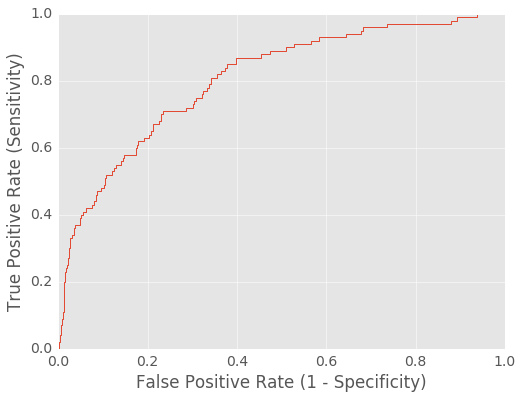

In [241]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

In [242]:
print(metrics.roc_curve(y_test, y_pred_prob))

(array([ 0.        ,  0.00107527,  0.00107527,  0.00430108,  0.00430108,
        0.00537634,  0.00537634,  0.00645161,  0.00645161,  0.00752688,
        0.00752688,  0.00860215,  0.00860215,  0.00967742,  0.00967742,
        0.01182796,  0.01182796,  0.01290323,  0.01290323,  0.01397849,
        0.01397849,  0.01505376,  0.01505376,  0.0172043 ,  0.0172043 ,
        0.01827957,  0.01827957,  0.02150538,  0.02150538,  0.02473118,
        0.02473118,  0.02580645,  0.02580645,  0.02688172,  0.02688172,
        0.03010753,  0.03010753,  0.0344086 ,  0.0344086 ,  0.03655914,
        0.03655914,  0.0483871 ,  0.0483871 ,  0.05053763,  0.05053763,
        0.05591398,  0.05591398,  0.06129032,  0.06129032,  0.07419355,
        0.07419355,  0.08064516,  0.08064516,  0.08387097,  0.08387097,
        0.08602151,  0.08602151,  0.09462366,  0.09462366,  0.10215054,
        0.10215054,  0.10322581,  0.10322581,  0.10537634,  0.10537634,
        0.10645161,  0.10645161,  0.12043011,  0.12043011,  0.1

In [243]:
# calculate AUC
print metrics.roc_auc_score(y_test, y_pred_prob)

0.807483870968


array([<matplotlib.axes._subplots.AxesSubplot object at 0x1831e1cd0>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x183380b90>], dtype=object)

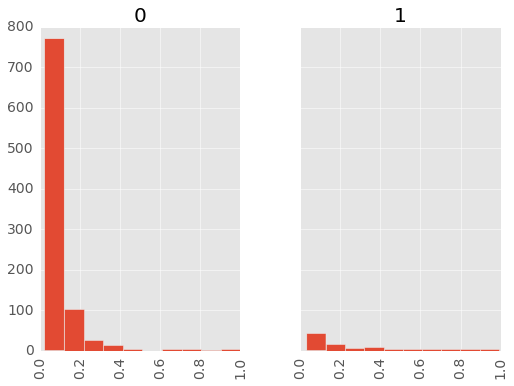

In [244]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)

In [245]:
# define X and y
feature_cols = ['housing_yes', 'poutcome_success', 'duration' ]
X = bank[feature_cols]
y = bank.subscribe

# train/test split
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# train a logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e9)
logreg.fit(X_train, y_train)

# make predictions for testing set
y_pred_class = logreg.predict(X_test)

# calculate testing accuracy
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.91359223301


In [246]:
# predict probability 
y_pred_prob = logreg.predict_proba(X_test)[:, 1]
print(y_pred_prob)

[ 0.0319746   0.22579728  0.60457502 ...,  0.44210635  0.29165422
  0.03104227]


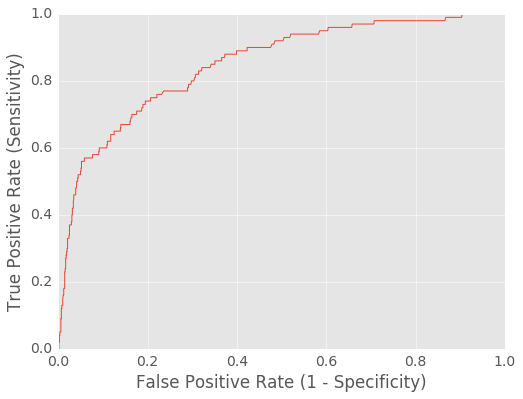

In [247]:
# plot ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1837c0190>,
       <matplotlib.axes._subplots.AxesSubplot object at 0x183b04650>], dtype=object)

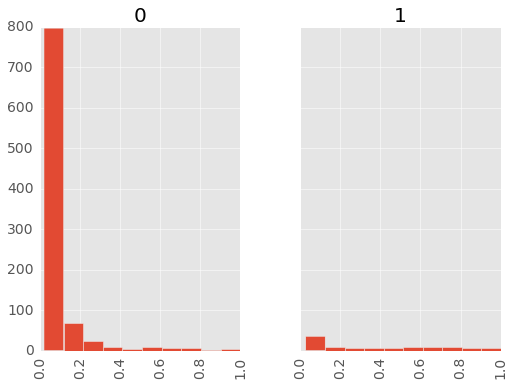

In [248]:
# histogram of predicted probabilities grouped by actual response value
df = pd.DataFrame({'probability':y_pred_prob, 'actual':y_test})
df.hist(column='probability', by='actual', sharex=True, sharey=True)